In [50]:
import pandas as pd
import matplotlib as plt
import seaborn as snb
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/USER/Downloads/Education/global_student_migration.csv')

# Data Preparation

In [5]:
df.shape

(5000, 20)

In [6]:
df.head(5)

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [4]:
df.describe()

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


# Check Duplicate data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [11]:
df_dup_sum = df.duplicated().sum()
df_dup = df[df.duplicated()]
print('จำนวนข้อมูลซ้ำ:',df_dup_sum)
df_dup

จำนวนข้อมูลซ้ำ: 0


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score


# Check missing value

In [15]:
df_check_miss = df.isnull().sum()
df_check_miss

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64

In [21]:
#เอาทุก row ที่ไม่มีข้อมูลออกให้หมด
df_cleaned = df.dropna(subset=['placement_country','placement_company','language_proficiency_test'],how='any')
df_cleaned.isnull().sum()

student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64

# Data Visualization

<Axes: ylabel='destination_country'>

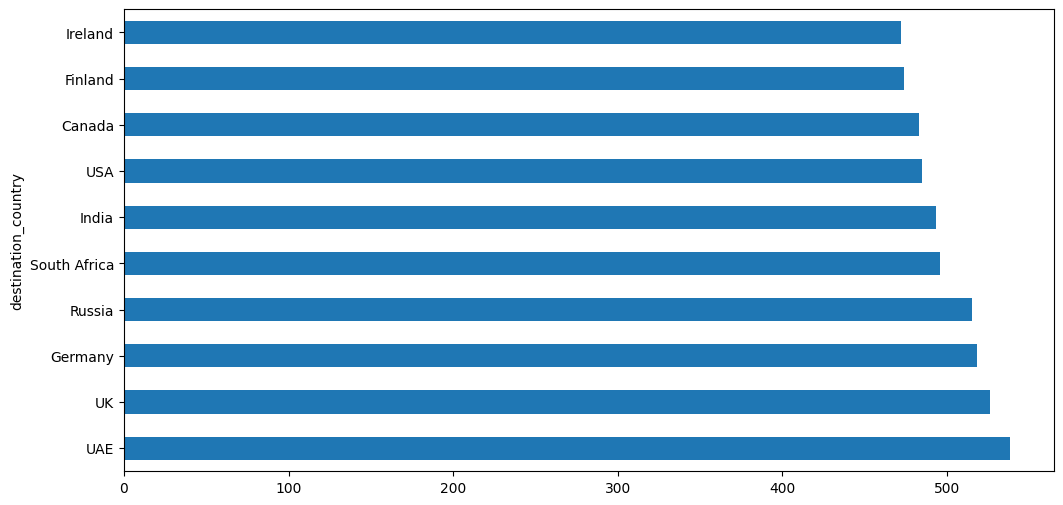

In [26]:
df_target_country = df['destination_country'].value_counts()
df_target_country.plot(kind='barh',figsize =(12,6))
#แสดงเป้าหมายของแต่ละประเทศที่ย้ายไปมากที่สุด

In [30]:
migration_counts = df.groupby(['origin_country','destination_country']).size().reset_index(name='count')
migration_counts

,origin_country,destination_country,count
0,Canada,Finland,52
1,Canada,Germany,67
2,Canada,India,51
3,Canada,Ireland,58
4,Canada,Russia,68
...,...,...,...
85,USA,Ireland,69
86,USA,Russia,54
87,USA,South Africa,59
88,USA,UAE,59


# Sankey visualization

In [31]:
# สร้าง list label (ประเทศทั้งหมด ไม่ซ้ำกัน)
all_countries = list(pd.unique(migration_counts[['origin_country', 'destination_country']].values.ravel('K')))

# สร้าง mapping ชื่อประเทศ → ตัวเลข
country_to_id = {country: i for i, country in enumerate(all_countries)}

# สร้าง source, target, และ value
migration_counts['source_id'] = migration_counts['origin_country'].map(country_to_id)
migration_counts['target_id'] = migration_counts['destination_country'].map(country_to_id)

# สร้าง sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_countries,
        color="blue"
    ),
    link=dict(
        source=migration_counts['source_id'],
        target=migration_counts['target_id'],
        value=migration_counts['count']
    ))])

fig.update_layout(title_text="Student Migration Flow", font_size=10)
fig.show()


# Machine Learning XgBoost

In [38]:
new_migration_counts = df.groupby(['year_of_enrollment','origin_country','destination_country']).size().reset_index(name='count')
new_migration_counts.head(7)

,year_of_enrollment,origin_country,destination_country,count
0,2019,Canada,Finland,13
1,2019,Canada,Germany,13
2,2019,Canada,India,15
3,2019,Canada,Ireland,11
4,2019,Canada,Russia,11
5,2019,Canada,South Africa,13
6,2019,Canada,UAE,14


In [ ]:
#label encoder = สร้าง object ไว้ใช้สำหรับการแปลงค่าข้อความให้เป็นตัวเลข สำหรับโมเดล
le_origin = LabelEncoder()
le_destination = LabelEncoder()
new_migration_counts['origin_encoded'] = le_origin.fit_transform(new_migration_counts['origin_country'])
new_migration_counts['destination_encoded'] = le_destination.fit_transform(new_migration_counts['destination_country'])

In [44]:
#Feature
X = new_migration_counts[['year_of_enrollment', 'origin_encoded', 'destination_encoded']]
y = new_migration_counts['count']



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = XGBRegressor(n_estimators = 100,learning_rate =0.1,random_state = 42)
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [51]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
print('R² Score:', r2_score(y_test, y_pred))


RMSE: 4.235950810190957
R² Score: -0.6551897525787354


In [60]:
#ทำนายปีถัดไป
future_data = pd.DataFrame({
    'year_of_enrollment': [2026]*len(X_test),
    'origin_encoded': X_test['origin_encoded'],
    'destination_encoded': X_test['destination_encoded'],
})

future_predictions = model.predict(future_data)

print(future_predictions[:10])  # ดูแค่ 10 อันดับแรก


[10.485927 10.603581 13.55868  11.705203  9.666932  7.705515  9.666932
 10.47353  14.411022 13.55868 ]


In [61]:
future_data.head(10)

,year_of_enrollment,origin_encoded,destination_encoded
407,2026,5,2
444,2026,9,3
117,2026,3,0
30,2026,3,4
415,2026,6,1
157,2026,7,4
325,2026,6,1
447,2026,9,6
268,2026,9,7
297,2026,3,0


In [64]:
origin_country = le_origin.inverse_transform(future_data['origin_encoded'])
destination_country = le_destination.inverse_transform(future_data['destination_encoded'])

for i in range(10):
    print(f"{origin_country[i]} → {destination_country[i]}: {future_predictions[i]:.2f} คน")


Russia → Germany: 10.49 คน
USA → India: 10.60 คน
India → Canada: 13.56 คน
India → Ireland: 11.71 คน
South Africa → Finland: 9.67 คน
UAE → Ireland: 7.71 คน
South Africa → Finland: 9.67 คน
USA → South Africa: 10.47 คน
USA → UAE: 14.41 คน
India → Canada: 13.56 คน
